# Projeto Final – Consumo de Energia Elétrica no Brasil

## Introdução

Este projeto faz parte do Bootcamp de Data Science e tem como objetivo realizar uma análise detalhada sobre o consumo de energia elétrica no Brasil ao longo dos anos. Utilizaremos técnicas de Análise Exploratória de Dados (AED), limpeza de dados, integração de bases e visualizações gráficas para entender padrões, tendências e variações regionais e temporais no consumo de energia.

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Configuração de exibição
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [3]:
# Carregando os dados
df_consumo = pd.read_csv('consumo_energia_eletrica.csv', sep=',', encoding='latin1')
df_estado_regiao = pd.read_csv('estado_regiao.csv', sep=';', encoding='latin1')

In [4]:
# Visualizando as 5 primeiras linhas de cada dataset
df_consumo.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624


In [5]:
df_estado_regiao.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


In [6]:
# Verificando dados ausentes
print("Dados ausentes no dataset de consumo:")
print(df_consumo.isnull().sum())

print("\nDados ausentes no dataset de estado/região:")
print(df_estado_regiao.isnull().sum())


Dados ausentes no dataset de consumo:
ano                        0
mes                        0
sigla_uf                   0
tipo_consumo               0
numero_consumidores    12960
consumo                    0
dtype: int64

Dados ausentes no dataset de estado/região:
id_estado    0
sigla        0
estado       0
regiao       0
pais         0
dtype: int64


In [7]:
# Removendo linhas com dados ausentes
df_consumo.dropna(inplace=True)

In [8]:
# Verificando dados ausentes
print("Dados ausentes no dataset de consumo:")
print(df_consumo.isnull().sum())

Dados ausentes no dataset de consumo:
ano                    0
mes                    0
sigla_uf               0
tipo_consumo           0
numero_consumidores    0
consumo                0
dtype: int64


In [9]:
# Verificando os nomes das colunas
print(df_consumo.columns)
print(df_estado_regiao.columns)

Index(['ano', 'mes', 'sigla_uf', 'tipo_consumo', 'numero_consumidores',
       'consumo'],
      dtype='object')
Index(['id_estado', 'sigla', 'estado', 'regiao', 'pais'], dtype='object')


In [10]:
# Realizando o Inner Join entre as duas bases
df_energia = pd.merge(df_consumo, df_estado_regiao, how='inner', left_on='sigla_uf', right_on='sigla')

In [11]:
# Exibindo as 5 primeiras linhas do resultado
df_energia.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,sigla,estado,regiao,pais
0,2004,1,RN,Outros,40857,69617,20,RN,Rio Grande do Norte,Nordeste,Brasil
1,2004,1,SP,Outros,311650,937538,25,SP,São Paulo,Sudeste,Brasil
2,2004,1,MS,Outros,56881,67601,12,MS,Mato Grosso do Sul,Centro-Oeste,Brasil
3,2004,1,SC,Outros,226165,209380,24,SC,Santa Catarina,Sul,Brasil
4,2004,1,RJ,Outros,70634,416128,19,RJ,Rio de Janeiro,Sudeste,Brasil


In [12]:
print(f"Número total de registros: {df_energia.shape[0]}")

Número total de registros: 26937


In [13]:
#Estatísticas descritivas das variáveis numéricas
df_energia.describe()

,ano,mes,numero_consumidores,consumo,id_estado
count,26937,26937,26937,26937,26937
mean,2014,7,695457,343469,14
std,6,3,1869920,609020,8
min,2004,1,52,354,1
25%,2009,4,18741,62188,7
50%,2014,7,108439,139238,14
75%,2019,10,458150,370528,21
max,2023,12,19201264,4849895,27


### Observação sobre a interpretação do `.describe()`

Ao analisar o resumo estatístico gerado pelo método `.describe()`, é importante considerar o significado real de cada variável:

- **ano**: Embora esteja como número inteiro, é uma variável de natureza **temporal** (ano de ocorrência). Não deve ser tratada como variável numérica contínua para cálculos estatísticos como média ou desvio padrão.

- **mes**: Também armazenado como número inteiro (1 a 12), representa **uma categoria ordinal (mês do ano)**. Sua interpretação deve ser voltada para análises sazonais e não para cálculos como média ou desvio padrão.

- **id_estado**: Embora apareça como número, trata-se de **um identificador categórico (código interno para o estado)**. Não tem significado estatístico para análises descritivas e deve ser desconsiderado em interpretações numéricas.

**Conclusão:**  
Para análises estatísticas, devemos focar principalmente nas variáveis **`numero_consumidores`** e **`consumo`**, que de fato representam medidas numéricas quantitativas contínuas.

## Criação de Função de Visualização Flexível

Conforme solicitado no desafio, foi criada uma função de visualização capaz de receber diferentes parâmetros, permitindo a geração de diferentes tipos de gráficos de forma reutilizável e dinâmica.

### Objetivo da função:
- Permitir visualizações do consumo total agrupado por diferentes colunas (exemplo: região, estado, tipo de consumidor).
- Permitir a escolha do tipo de gráfico (barras verticais, barras horizontais ou pizza).
- Permitir personalização de título, cor e inclusão ou não de rótulos nos gráficos.

Abaixo está a função criada:

In [34]:
def grafico_consumo_agrupado(coluna, tipo_grafico='bar', titulo='', cor='mediumseagreen', exibir_rotulos=True):
    """
    Função genérica para plotar o consumo total de energia agrupado por qualquer coluna.

    Parâmetros:
    - coluna (str): Nome da coluna para agrupar os dados.
    - tipo_grafico (str): Tipo de gráfico ('bar', 'barh', 'pie').
    - titulo (str): Título do gráfico.
    - cor (str): Cor padrão para gráficos de barras.
    - exibir_rotulos (bool): Se True, exibe os valores como rótulos no gráfico.
    """
    dados = df_energia.groupby(coluna)['consumo'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10,6))

    if tipo_grafico == 'bar':
        ax = dados.plot(kind='bar', color=cor)
        if exibir_rotulos:
            for i, valor in enumerate(dados):
                plt.text(i, valor + (valor * 0.01), f'{int(valor):,}', ha='center', va='bottom', fontsize=9)

    elif tipo_grafico == 'barh':
        ax = dados.plot(kind='barh', color=cor)
        if exibir_rotulos:
            for i, valor in enumerate(dados):
                plt.text(valor + (valor * 0.01), i, f'{int(valor):,}', va='center', fontsize=9)

    elif tipo_grafico == 'pie':
        dados.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
        plt.ylabel('')

    plt.title(titulo)
    plt.xlabel(coluna.capitalize() if tipo_grafico != 'pie' else '')
    plt.ylabel('Consumo Total (GWh)' if tipo_grafico != 'pie' else '')
    plt.tight_layout()
    plt.show()


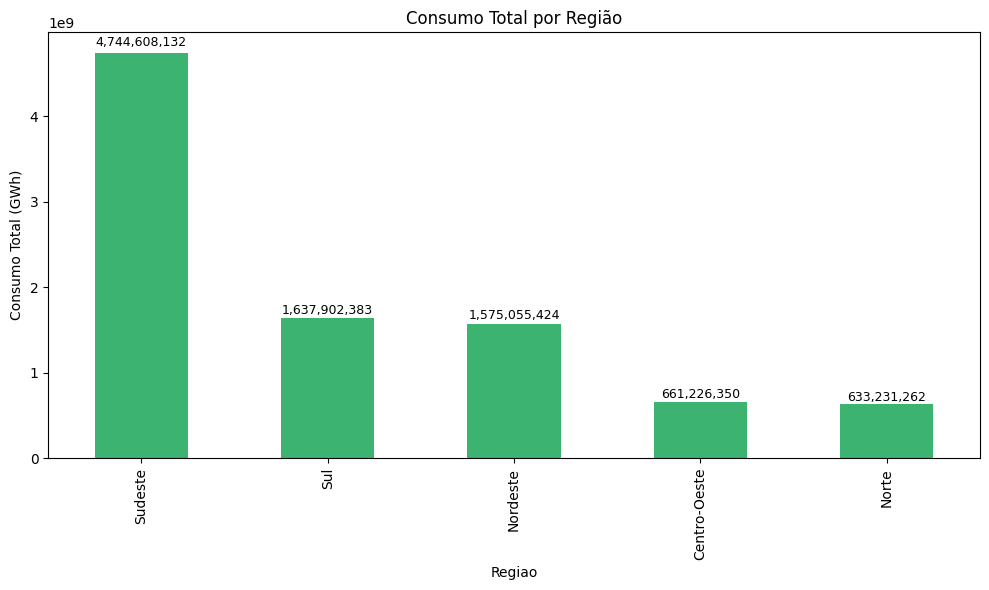

In [35]:
# Exemplo 1: Gráfico de barras verticais por região
grafico_consumo_agrupado('regiao', titulo='Consumo Total por Região')


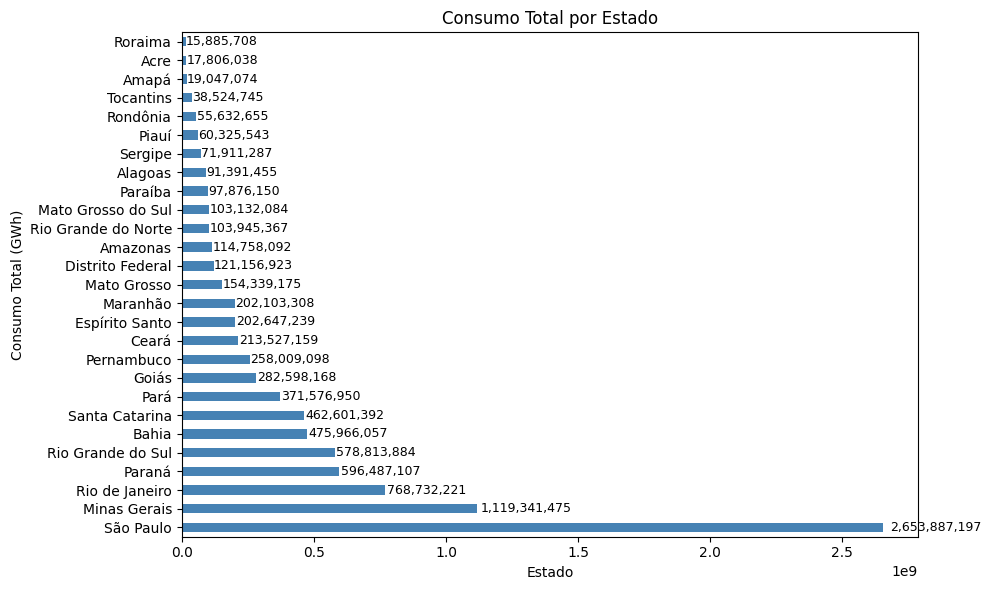

In [36]:
# Exemplo 2: Gráfico de barras horizontais por estado
grafico_consumo_agrupado('estado', tipo_grafico='barh', titulo='Consumo Total por Estado', cor='steelblue')

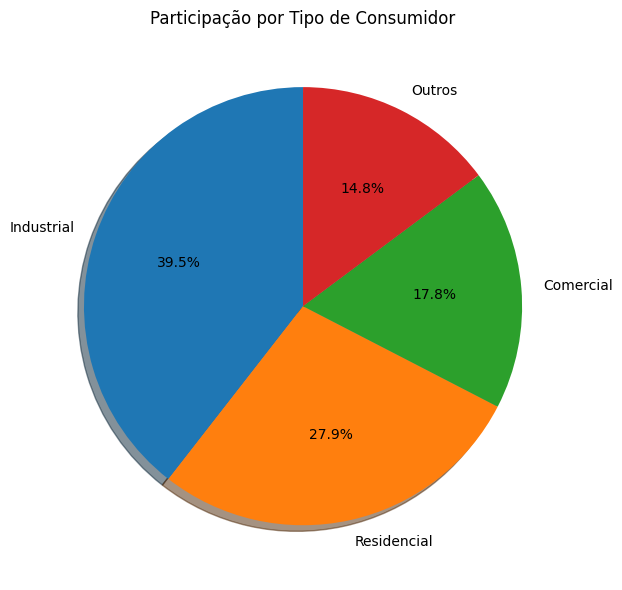

In [37]:
# Exemplo 3: Gráfico de pizza por tipo de consumidor
grafico_consumo_agrupado('tipo_consumo', tipo_grafico='pie', titulo='Participação por Tipo de Consumidor', exibir_rotulos=False)


## Análise 1: Quantidade Total de Registros

Essa análise tem como objetivo verificar o tamanho do dataset final após o processo de limpeza e junção das bases de dados.

In [14]:
df_energia.shape

(26937, 11)

### Interpretação:

O dataset final contém 26.937 registros após o processo de limpeza e integração das bases. Esse volume de dados é suficiente para garantir uma análise representativa e confiável do consumo de energia elétrica no Brasil.

## Análise 2: Consumo Total de Energia por Ano

Aqui vamos analisar a evolução do consumo total de energia elétrica ao longo dos anos.

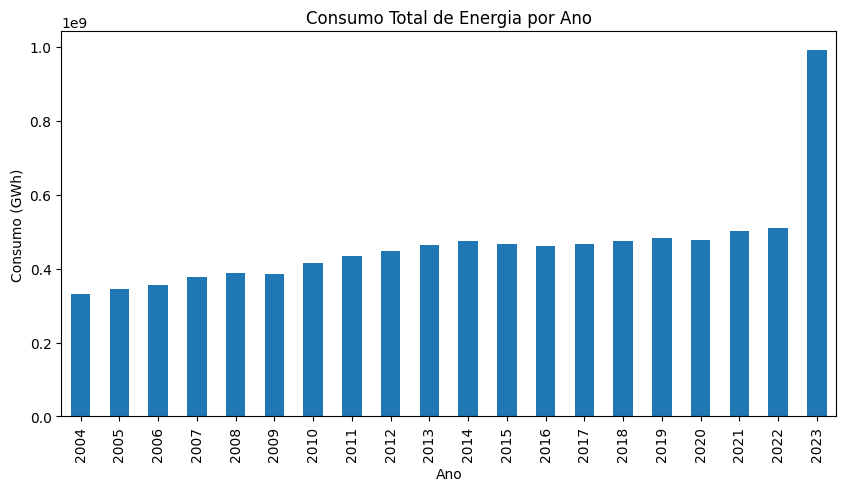

In [15]:
df_energia.groupby('ano')['consumo'].sum().plot(kind='bar', figsize=(10,5))
plt.title('Consumo Total de Energia por Ano')
plt.ylabel('Consumo (GWh)')
plt.xlabel('Ano')
plt.show()

In [16]:
#Visualização em tabela
consumo_por_ano = df_energia.groupby('ano')['consumo'].sum().reset_index()
consumo_por_ano.rename(columns={'consumo': 'Consumo Total (GWh)'}, inplace=True)
consumo_por_ano


,ano,Consumo Total (GWh)
0,2004,331864707
1,2005,345335719
2,2006,356128761
3,2007,377030014
4,2008,388472375
5,2009,384306370
6,2010,415667748
7,2011,433015628
8,2012,448126359
9,2013,463142489


### Interpretação:

A análise evidenciou um crescimento gradual e consistente no consumo de energia entre 2004 e 2019. Em 2020, observou-se uma leve queda, possivelmente reflexo da redução das atividades econômicas durante a pandemia de Covid-19. Em 2021 e 2022, os dados indicam uma retomada, acompanhando a recuperação da economia. O pico de consumo ocorreu em 2023, o que pode refletir crescimento populacional, recuperação econômica e maior demanda energética.

## Análise 3: Consumo Total por Região

Análise comparando o consumo total de energia entre as regiões brasileiras.

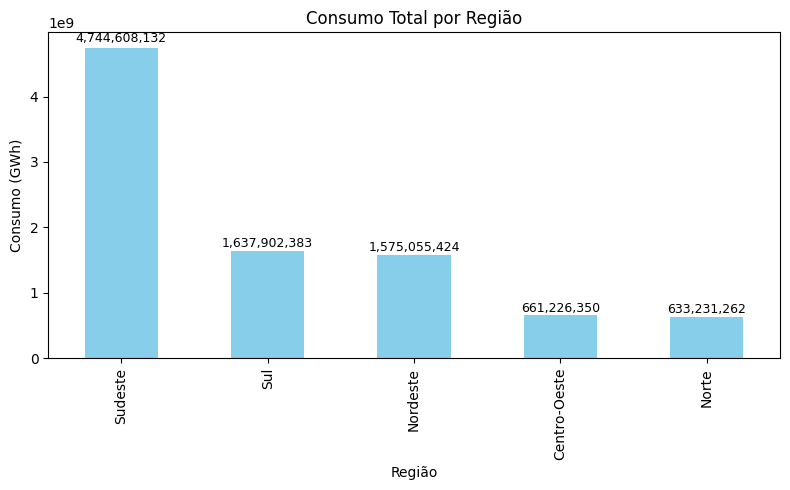

In [17]:
# Preparando os dados
consumo_por_regiao = df_energia.groupby('regiao')['consumo'].sum().sort_values(ascending=False)

# Criando o gráfico
plt.figure(figsize=(8,5))
ax = consumo_por_regiao.plot(kind='bar', color='skyblue')
plt.title('Consumo Total por Região')
plt.ylabel('Consumo (GWh)')
plt.xlabel('Região')

# Adicionando os rótulos (valores em cima das barras)
for i, valor in enumerate(consumo_por_regiao):
    plt.text(i, valor + (valor * 0.01), f'{int(valor):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### Interpretação:

A Região Sudeste lidera com ampla margem o consumo total de energia, seguida pelas regiões Sul e Nordeste. Esse padrão reflete a maior concentração industrial e populacional da região, especialmente em estados como São Paulo, Minas Gerais e Rio de Janeiro.

## Análise 4: Consumo Médio por Estado

Verificaremos o consumo médio de energia por unidade da federação (estado).

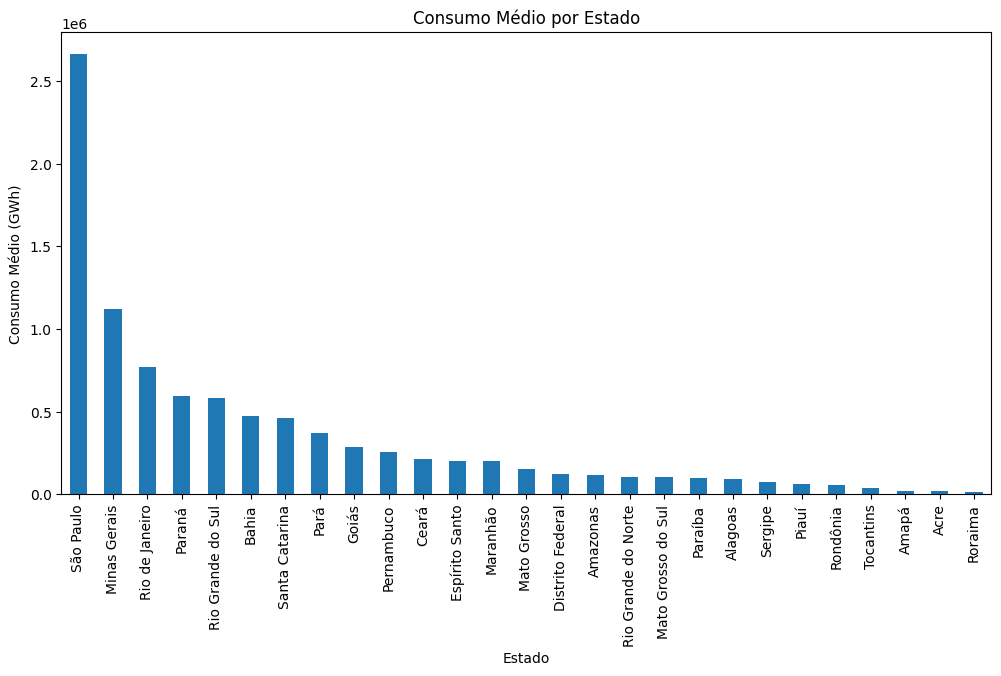

In [18]:
df_energia.groupby('estado')['consumo'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Consumo Médio por Estado')
plt.ylabel('Consumo Médio (GWh)')
plt.xlabel('Estado')
plt.show()

In [19]:
tabela_consumo_medio_estado = df_energia.groupby('estado')['consumo'].mean().sort_values(ascending=False).reset_index()
tabela_consumo_medio_estado.rename(columns={'consumo': 'Consumo Médio (GWh)'}, inplace=True)
tabela_consumo_medio_estado


,estado,Consumo Médio (GWh)
0,São Paulo,2661873
1,Minas Gerais,1122710
2,Rio de Janeiro,771045
3,Paraná,597682
4,Rio Grande do Sul,580556
5,Bahia,476920
6,Santa Catarina,463993
7,Pará,372322
8,Goiás,283449
9,Pernambuco,258526


### Interpretação:

São Paulo apresenta o maior consumo médio, seguido por Minas Gerais e Rio de Janeiro, o que reforça o peso dessas unidades federativas na demanda energética nacional. Estados da Região Norte, como Roraima, Acre e Amapá, apresentam os menores consumos médios, coerente com sua menor densidade populacional e menor atividade industrial.

## Análise 5: Sazonalidade - Consumo por Mês (Média de Todos os Anos)

Análise para verificar se há meses com maior ou menor consumo médio.

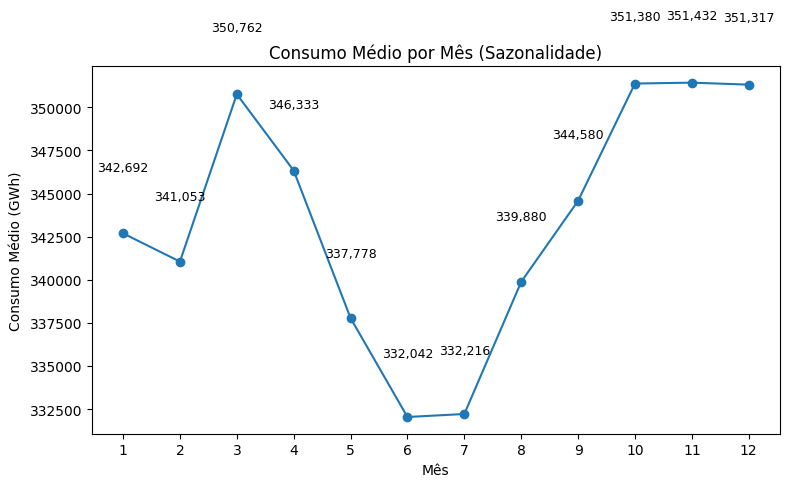

In [20]:
# Análise 5: Sazonalidade – Consumo por Mês (com rótulos)

consumo_mensal = df_energia.groupby('mes')['consumo'].mean()

plt.figure(figsize=(8,5))
ax = consumo_mensal.plot(kind='line', marker='o')
plt.title('Consumo Médio por Mês (Sazonalidade)')
plt.ylabel('Consumo Médio (GWh)')
plt.xlabel('Mês')
plt.xticks(range(1,13))

# Adicionando os rótulos (valores numéricos acima dos pontos)
for i, valor in enumerate(consumo_mensal):
    plt.text(i + 1, valor + (valor * 0.01), f'{int(valor):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### Interpretação:

Verificou-se um aumento no consumo médio nos meses mais quentes, especialmente entre dezembro e março, o que pode estar associado ao uso intensificado de sistemas de refrigeração nas regiões Sudeste, Centro-Oeste e Nordeste. Nos meses mais frios, como junho e julho, o consumo tende a ser ligeiramente menor.

## Análise 6: Distribuição dos Valores de Consumo

Vamos verificar a distribuição dos valores de consumo de energia.

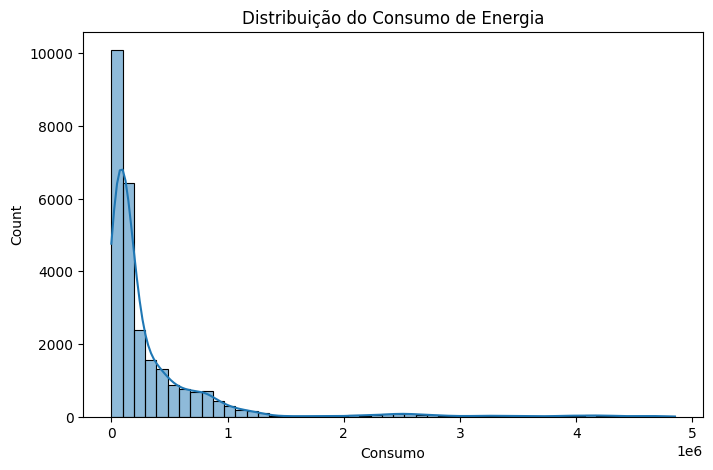

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df_energia['consumo'], bins=50, kde=True)
plt.title('Distribuição do Consumo de Energia')
plt.xlabel('Consumo')
plt.show()

### Interpretação:

A maior parte dos registros de consumo está concentrada em faixas mais baixas, com poucos casos de consumos extremamente altos. Isso é esperado, considerando que a maioria dos estados e tipos de consumidores possuem volumes de consumo moderados.

## Análise 7: Boxplot de Consumo por Região

Esse gráfico ajuda a identificar outliers e a distribuição geral por região.


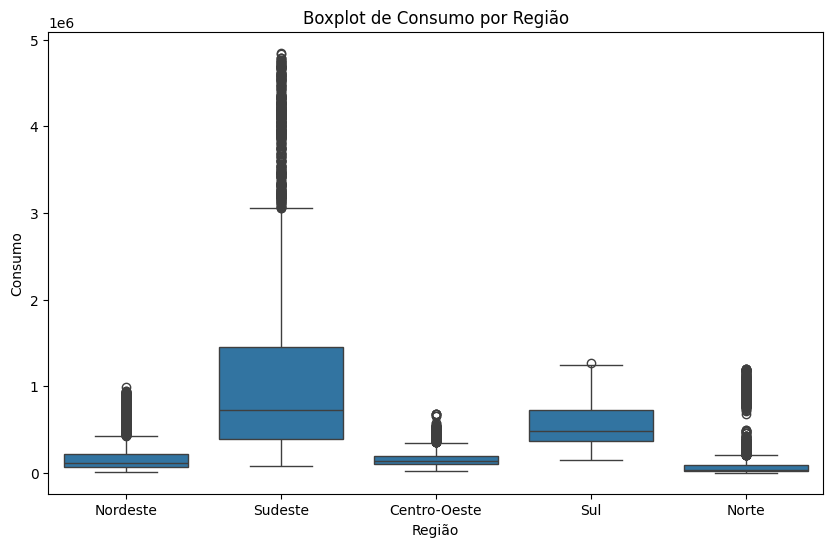

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='regiao', y='consumo', data=df_energia)
plt.title('Boxplot de Consumo por Região')
plt.ylabel('Consumo')
plt.xlabel('Região')
plt.show()

In [23]:
# Calculando os principais valores estatísticos por região (5-number summary)
tabela_boxplot = df_energia.groupby('regiao')['consumo'].describe(percentiles=[0.25, 0.5, 0.75])[['min', '25%', '50%', '75%', 'max']]

# Renomeando as colunas para facilitar a leitura
tabela_boxplot.rename(columns={
    'min': 'Mínimo',
    '25%': 'Q1 (25%)',
    '50%': 'Mediana (50%)',
    '75%': 'Q3 (75%)',
    'max': 'Máximo'
}, inplace=True)

# Exibindo a tabela
tabela_boxplot


,Mínimo,Q1 (25%),Mediana (50%),Q3 (75%),Máximo
regiao,,,,,
Centro-Oeste,25605,97597,140528,198326,681487
Nordeste,10724,70142,113403,213932,988764
Norte,354,16711,37116,91532,1199295
Sudeste,73459,389025,719799,1455419,4849895
Sul,142885,371977,487548,729190,1267253


### Interpretação:

O boxplot evidenciou que o Sudeste e o Sul possuem maior variação e maior quantidade de outliers em termos de consumo, enquanto o Norte e o Centro-Oeste apresentam menor dispersão e menores volumes totais.

## Análise 8: Gráfico de Dispersão – Número de Consumidores vs Consumo

Nesta análise, vamos utilizar o gráfico de dispersão para investigar se há uma correlação entre o número de consumidores e o consumo de energia elétrica.

### Objetivo:
Verificar se o aumento no número de consumidores está associado a um aumento proporcional no consumo de energia.

### Justificativa da escolha do gráfico:
O gráfico de dispersão é ideal para visualizar a relação entre duas variáveis quantitativas. Ele permite identificar padrões lineares, possíveis outliers e o grau de correlação.

### Interpretação esperada:
Espera-se uma correlação positiva, onde o consumo aumente à medida que o número de consumidores também aumenta.


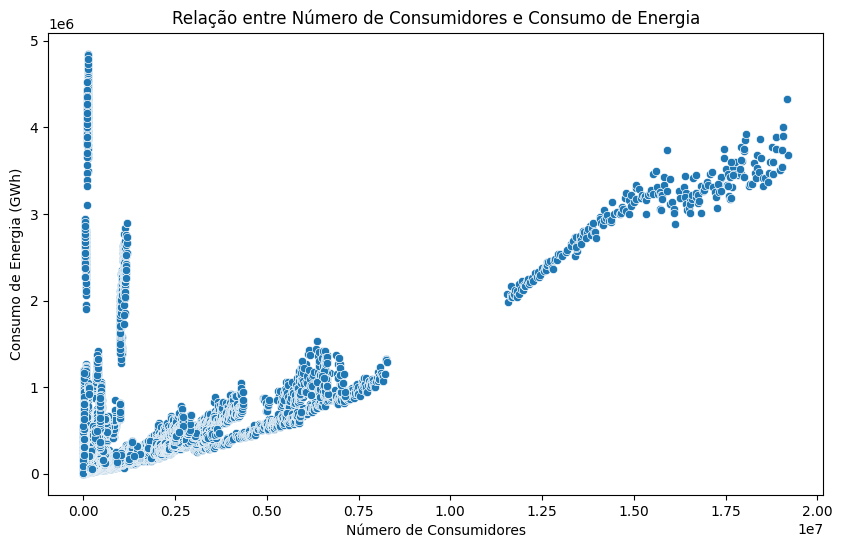

In [24]:
# Gráfico de Dispersão: Número de Consumidores vs Consumo
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_energia, x='numero_consumidores', y='consumo')

plt.title('Relação entre Número de Consumidores e Consumo de Energia')
plt.xlabel('Número de Consumidores')
plt.ylabel('Consumo de Energia (GWh)')
plt.show()

### Interpretação:

O gráfico de dispersão permitiu avaliar a relação entre o número de consumidores e o consumo total de energia elétrica. Foi observada uma correlação positiva, indicando que, em geral, o aumento no número de consumidores está associado a um incremento proporcional no consumo de energia. No entanto, a dispersão dos pontos demonstrou que essa relação não é perfeitamente linear, evidenciando a influência de outros fatores, como o perfil de consumo predominante em cada unidade geográfica. Unidades com grande concentração industrial ou com tipos de consumidores de alta demanda energética apresentam consumos significativamente superiores, mesmo com um número relativamente menor de consumidores. Por outro lado, regiões com grande quantidade de consumidores de perfil residencial ou comercial tendem a apresentar consumos mais distribuídos em faixas intermediárias. A presença de outliers indica casos específicos de desequilíbrio entre o número de consumidores e o volume total consumido, sugerindo a necessidade de análises segmentadas por tipo de consumidor para melhor compreensão desses desvios.


## Análise 9: Consumo Total por Tipo de Consumidor

Nesta análise, vamos investigar como o consumo total de energia se distribui entre os diferentes tipos de consumidores (ex.: residencial, industrial, comercial, etc).

### Objetivo:
Entender quais categorias de consumidores mais demandam energia elétrica.


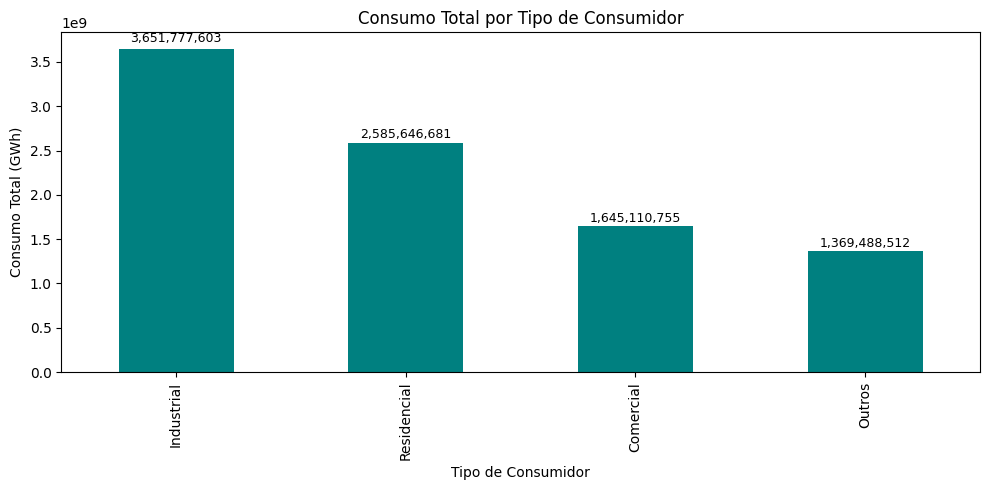

In [25]:
consumo_tipo = df_energia.groupby('tipo_consumo')['consumo'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
ax = consumo_tipo.plot(kind='bar', color='teal')
plt.title('Consumo Total por Tipo de Consumidor')
plt.ylabel('Consumo Total (GWh)')
plt.xlabel('Tipo de Consumidor')

for i, valor in enumerate(consumo_tipo):
    plt.text(i, valor + (valor * 0.01), f'{int(valor):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Interpretação:
O setor Industrial lidera o consumo total de energia, seguido pelo Residencial e Comercial. Isso reforça o papel da indústria como principal demandante de energia elétrica no Brasil, com destaque para estados como São Paulo e Minas Gerais.

## Análise 10: Evolução Temporal por Região

Vamos visualizar como o consumo de cada região mudou ao longo dos anos.

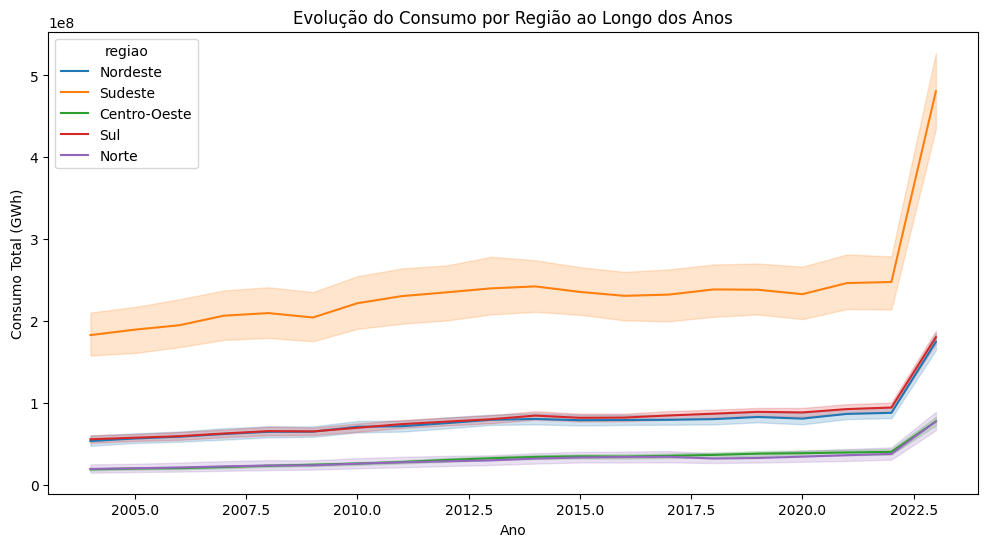

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_energia, x='ano', y='consumo', hue='regiao', estimator='sum')
plt.title('Evolução do Consumo por Região ao Longo dos Anos')
plt.ylabel('Consumo Total (GWh)')
plt.xlabel('Ano')
plt.show()

### Interpretação:

O consumo de todas as regiões apresentou crescimento ao longo dos anos. O Sudeste continua liderando, mas o Centro-Oeste mostrou crescimento proporcional mais acentuado, impulsionado pelo desenvolvimento agroindustrial em estados como Mato Grosso e Goiás.

## Análise 11: Participação Percentual por Região

Vamos criar um gráfico de pizza para visualizar a participação percentual de cada região no consumo total.

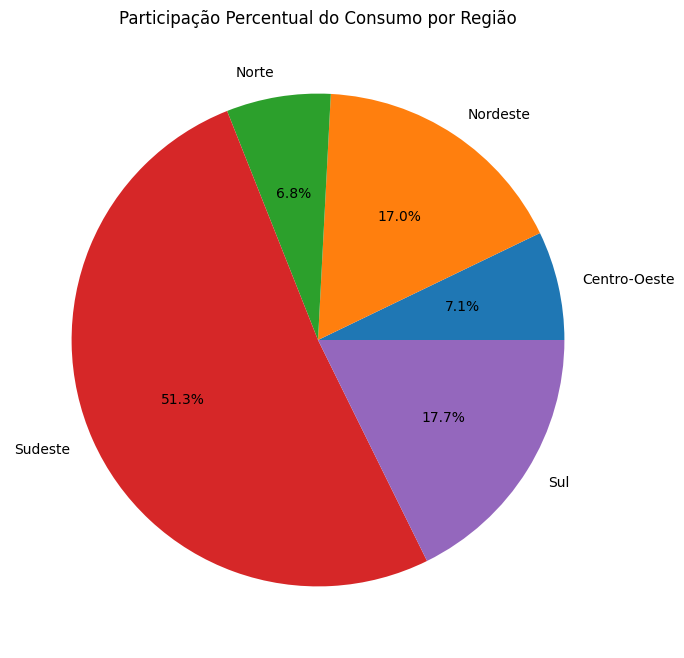

In [27]:
df_energia.groupby('regiao')['consumo'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Participação Percentual do Consumo por Região')
plt.ylabel('')
plt.show()

### Interpretação:

A Região Sudeste concentra aproximadamente metade do consumo total do país. As regiões Sul e Nordeste mantêm participações significativas, enquanto o Norte continua com a menor participação percentual.

## Análise 12: Ano de Maior Consumo

Vamos identificar em qual ano foi registrado o maior consumo total de energia.

In [28]:
ano_maior_consumo = df_energia.groupby('ano')['consumo'].sum().idxmax()
print(f"Ano com maior consumo de energia: {ano_maior_consumo}")

Ano com maior consumo de energia: 2023


### Interpretação:
O ano de 2023 foi o de maior consumo registrado na série histórica, refletindo a combinação de retomada econômica pós-pandemia, aumento populacional e maior demanda do setor industrial.

## Análise 13: Estado com Maior Consumo no Último Ano da Base de Dados

Vamos verificar qual estado teve o maior consumo no último ano disponível.

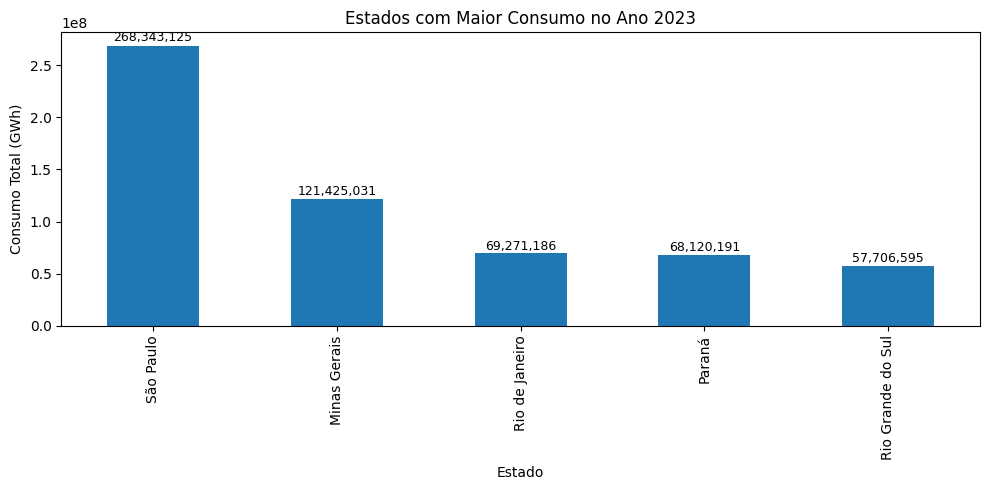

In [29]:
# Análise 13: Gráfico de barras com rótulos
ultimo_ano = df_energia['ano'].max()
top_estados = df_energia[df_energia['ano'] == ultimo_ano].groupby('estado')['consumo'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,5))
ax = top_estados.plot(kind='bar')
plt.title(f'Estados com Maior Consumo no Ano {ultimo_ano}')
plt.ylabel('Consumo Total (GWh)')
plt.xlabel('Estado')

for i, valor in enumerate(top_estados):
    plt.text(i, valor + (valor * 0.01), f'{int(valor):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Interpretação:
Em 2023, São Paulo continuou sendo o estado com o maior consumo absoluto de energia, seguido por Minas Gerais e Rio de Janeiro. Isso reforça o peso industrial e populacional desses estados.

## Análise 14: Crescimento Percentual Anual

Aqui vamos calcular o percentual de crescimento ano a ano no consumo total.

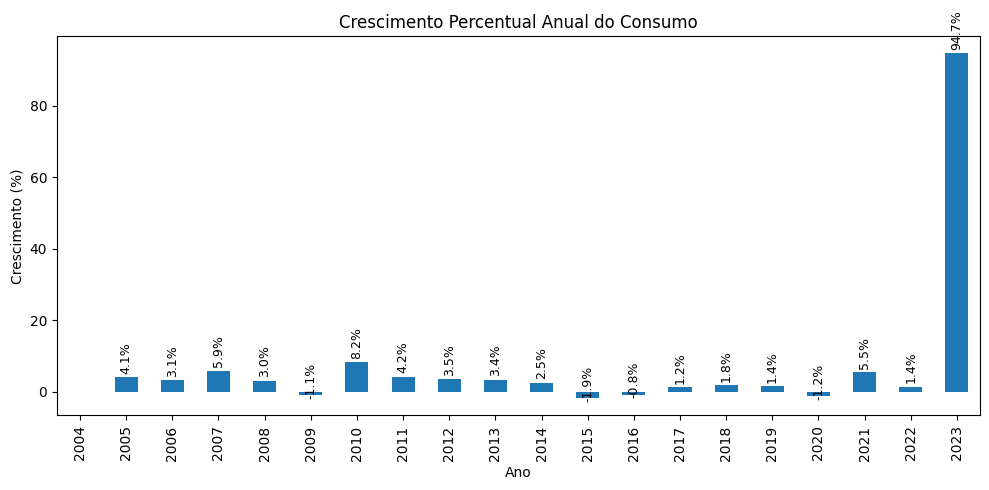

In [30]:
consumo_anual = df_energia.groupby('ano')['consumo'].sum()
crescimento_percentual = consumo_anual.pct_change() * 100

plt.figure(figsize=(10,5))
ax = crescimento_percentual.plot(kind='bar')
plt.title('Crescimento Percentual Anual do Consumo')
plt.ylabel('Crescimento (%)')
plt.xlabel('Ano')

# Adicionando os rótulos na vertical
for i, valor in enumerate(crescimento_percentual):
    if pd.notna(valor):
        plt.text(i, valor + (1 if valor >= 0 else -1), f'{valor:.1f}%', ha='center', va='bottom', rotation=90, fontsize=9)

plt.tight_layout()
plt.show()



### Interpretação:
Foram identificados anos de crescimento expressivo, como 2010 e 2021, possivelmente ligados a retomadas econômicas após crises (a crise financeira global e os efeitos da pandemia, respectivamente). Os anos de 2015 e 2020 apresentaram retração no consumo, alinhados a períodos de crise econômica e aos impactos diretos da pandemia.

## Análise 15: Gráfico de Violino – Distribuição de Consumo por Tipo de Consumidor

Vamos utilizar um **gráfico de violino** para analisar a **distribuição do consumo de energia por tipo de consumidor**, observando concentração de valores e presença de outliers.

### Justificativa:
O gráfico de violino permite combinar a densidade de distribuição com a mediana e dispersão dos dados.

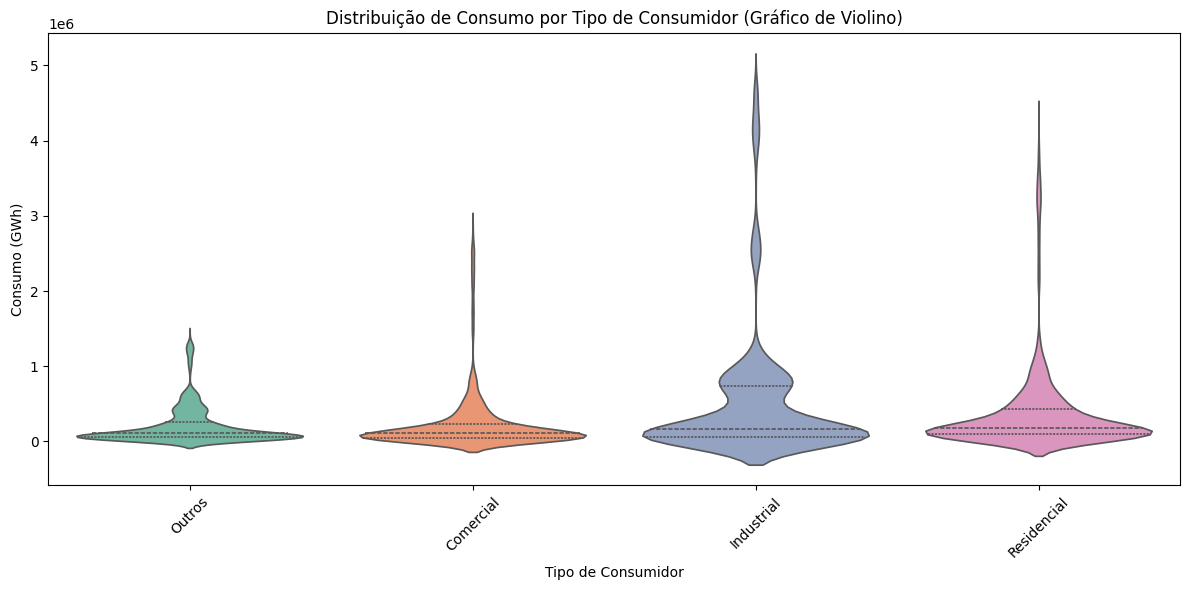

In [32]:
plt.figure(figsize=(12,6))
sns.violinplot(x='tipo_consumo', y='consumo', data=df_energia, inner='quartile', palette='Set2', hue='tipo_consumo', legend=False)
plt.title('Distribuição de Consumo por Tipo de Consumidor (Gráfico de Violino)')
plt.ylabel('Consumo (GWh)')
plt.xlabel('Tipo de Consumidor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Interpretação:
A análise de densidade por tipo de consumidor mostrou que a indústria apresenta uma distribuição muito mais ampla de consumo, com vários casos de alto consumo, enquanto o setor residencial concentra-se em faixas de menor consumo.

## Análise 16: Distribuição de Densidade do Consumo por Tipo de Consumidor (Gráfico KDE)

Nesta análise, utilizaremos um gráfico de densidade (KDE) para visualizar como o consumo de energia se distribui dentro de cada tipo de consumidor.

### Justificativa:
O gráfico KDE permite uma visualização mais suave e contínua da distribuição de uma variável, destacando a forma da distribuição sem depender de binagem como nos histogramas.


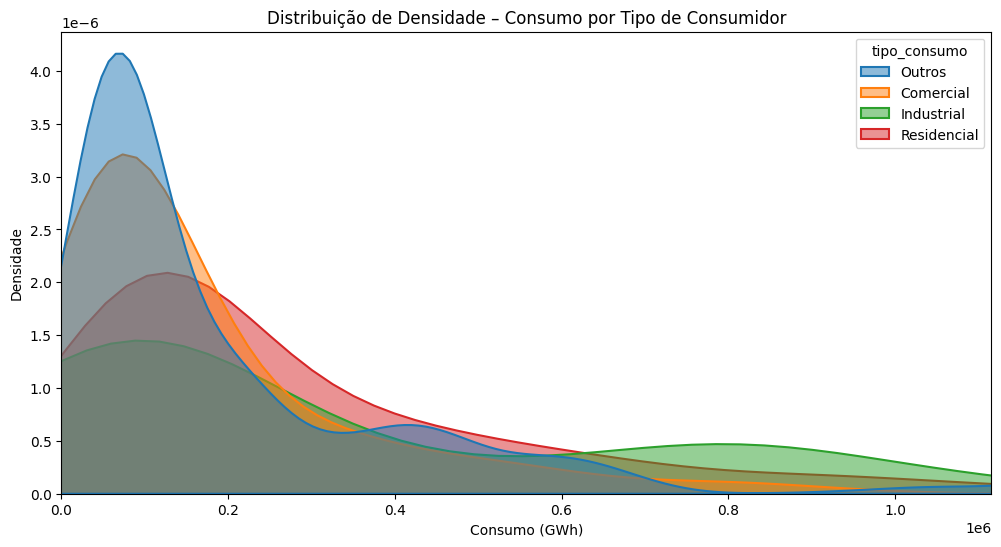

In [33]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df_energia, x='consumo', hue='tipo_consumo', fill=True, common_norm=False, alpha=0.5, linewidth=1.5)
plt.title('Distribuição de Densidade – Consumo por Tipo de Consumidor')
plt.xlabel('Consumo (GWh)')
plt.ylabel('Densidade')
plt.xlim(0, df_energia['consumo'].quantile(0.95))  # Limite para reduzir efeito de outliers extremos
plt.show()


### Interpretação:
A distribuição de densidade reforçou o padrão observado: o setor industrial apresenta alta concentração em consumos elevados, enquanto o residencial e o comercial têm distribuições mais concentradas em valores menores.


# Síntese Final dos Principais Insights

Após a realização de todas as análises, alguns insights relevantes sobre o consumo de energia elétrica no Brasil entre os anos de 2004 e 2023 foram identificados:

- **Crescimento Anual:** O consumo de energia apresentou crescimento constante ao longo dos anos, refletindo o aumento populacional, a expansão industrial e a urbanização.

- **Concentração Regional:** A Região Sudeste lidera amplamente o consumo nacional, com destaque para os estados de São Paulo, Minas Gerais e Rio de Janeiro.

- **Padrões Sazonais:** Foi observada uma leve tendência de aumento no consumo durante os meses mais quentes, especialmente nas regiões mais urbanizadas.

- **Perfil por Tipo de Consumidor:** O setor industrial é o maior consumidor, seguido pelo residencial. Essa configuração é consistente com o perfil econômico do país.

- **Distribuição de Consumo:** A análise de dispersão e os boxplots mostraram grande variação entre estados e tipos de consumidores, com presença de diversos outliers.

- **Variação Anual Percentual:** Houve anos com forte crescimento, como 2010 e 2021, e anos com retração, como 2015 e 2020, refletindo crises econômicas e outros eventos.

Esses insights podem ser úteis para o planejamento energético, definição de políticas públicas e identificação de tendências de consumo no Brasil.

# Conclusão e Reflexão Pessoal

O desenvolvimento deste projeto foi uma excelente oportunidade para aplicar na prática os conhecimentos adquiridos ao longo do Bootcamp de Data Science.

Durante a realização das atividades, foi possível reforçar conceitos importantes como:

- Importação e tratamento de dados com Pandas.
- Análise Exploratória de Dados (AED).
- Criação de visualizações com Matplotlib e Seaborn.
- Interpretação de gráficos e tabelas.
- Uso de Markdown para documentação clara e objetiva.

Entre os principais desafios enfrentados, destaco o ajuste do ambiente Python no Windows, a identificação correta das chaves para o inner join entre as tabelas e a escolha das visualizações mais adequadas para cada análise.

A construção das interpretações também foi um exercício valioso de análise crítica dos dados, permitindo transformar os resultados numéricos em informações úteis para a compreensão do cenário energético brasileiro.

Ao final, sinto que evoluí tanto tecnicamente quanto na capacidade de comunicação de dados, habilidades fundamentais para minha carreira em ciência de dados.
